<a href="https://colab.research.google.com/github/KamilShape/whey_analysis/blob/main/Whey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Introduction**


In [1]:
#Libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **2.Dataset analysis**

In [2]:
#dataset load
whey = pd.read_csv('/content/whey2.csv', encoding='latin1')

In [3]:
whey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             154 non-null    int64  
 1   Name           154 non-null    object 
 2   Company        154 non-null    object 
 3   Brand          154 non-null    object 
 4   Package        154 non-null    float64
 5   Package_type   154 non-null    object 
 6   Calories       154 non-null    float64
 7   Fat            154 non-null    float64
 8   Saturated_fat  154 non-null    float64
 9   Carbs          154 non-null    float64
 10  Sugar          154 non-null    float64
 11  Protein        154 non-null    float64
 12  WPC            154 non-null    float64
 13  WPI            154 non-null    float64
 14  Soy            154 non-null    float64
 15  Yeast          154 non-null    float64
 16  Pea            154 non-null    float64
 17  Casein         154 non-null    float64
 18  Cannabis  

In [4]:
whey = whey.drop('id', axis=1)

In [5]:
#price per 100g
whey['Price/100'] = whey['Price']/whey['Package']*100

In [6]:
whey.head(10)

,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,...,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100
0,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
2,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667
3,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444
4,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333
5,WPC PROTEIN ECONO 750G,SFD,SFD Nutrition,750.0,bag,387.0,6.50,3.5,12.2,6.0,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,44.99,5.998667
6,WPC PROTEIN ECONO 2250G,SFD,SFD Nutrition,2250.0,bag,387.0,6.50,3.5,12.2,6.0,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,139.99,6.221778
7,WPI ISOWHEY INSTANT 700g,SFD,SFD Nutrition,750.0,bag,366.0,1.55,1.0,2.7,2.0,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,71.99,9.598667
8,WPI ISOWHEY INSTANT 1800g,SFD,SFD Nutrition,2250.0,bag,366.0,1.55,1.0,2.7,2.0,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,169.99,7.555111
9,WHEY PROTEIN 300g,SFD,Allnutrition,300.0,bag,403.0,6.60,3.6,16.0,6.4,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.99,1.663333


In [7]:
#avg price
whey['Price'].mean()

141.9207142857143

In [8]:
#avg price per 100g
whey['Price/100'].mean()

12.527139593856427

## **2.1 Histogram**

(array([40., 57., 17., 12., 17.,  5.,  3.,  0.,  0.,  3.]),
 array([  4.99,  67.49, 129.99, 192.49, 254.99, 317.49, 379.99, 442.49,
        504.99, 567.49, 629.99]),
 <BarContainer object of 10 artists>)

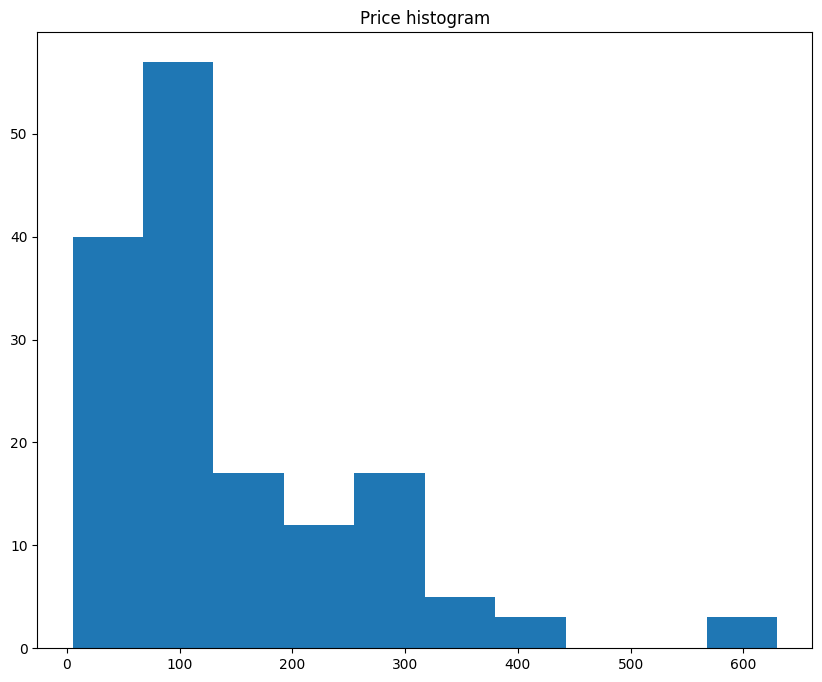

In [9]:
#histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Price histogram')
ax.hist(whey['Price'])

In [10]:
#shapiro - wilk test
shapiro_test = stats.shapiro(whey['Price'])
shapiro_test.pvalue
#p<0,05 - no bell curve

2.3080959886401242e-12

## **2.2 Removing outliers**

In [11]:
whey['Price'].quantile(0.90)

296.9900000000002

In [12]:
whey['Price'].quantile(0.1)

44.993

In [13]:
whey = whey[(whey['Price'] > whey['Price'].quantile(0.10)) & (whey['Price'] < whey['Price'].quantile(0.90))]

In [14]:
#dataset length after outliers removing
len(whey )

122

#**3.Data Visualisation**

In [15]:
#bar chart function
def bar_chart(ax, x, y, color, title, ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

#add text function
def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

In [16]:
types = ['WPC',	'WPI',	'Soy',	'Yeast',	'Pea',	'Casein',	'Cannabis',	'Beef']

In [17]:
wpc_price = whey[whey['WPC'] > 0 ]['Price'].mean()
wpi_price = whey[whey['WPI'] > 0 ]['Price'].mean()
soy_price = whey[whey['Soy'] > 0 ]['Price'].mean()
yeast_price = whey[whey['Yeast'] > 0 ]['Price'].mean()
pea_price = whey[whey['Pea'] > 0 ]['Price'].mean()
casein_price = whey[whey['Casein'] > 0 ]['Price'].mean()
cannabis_price = whey[whey['Cannabis'] > 0 ]['Price'].mean()
beef_price = whey[whey['Beef'] > 0 ]['Price'].median()
type_prices = [wpc_price, wpi_price, soy_price, yeast_price, pea_price, casein_price,cannabis_price, beef_price]

In [ ]:
# type_prices = []
# type_prices_100 = []
# for type in types:
#   type_prices.append(whey[whey[type] > 0 ]['Price'].mean())
#   type_prices_100.append(whey[whey[type] > 0 ]['Price/100'].mean())

In [18]:
wpc_price_100 = whey[whey['WPC'] > 0 ]['Price/100'].mean()
wpi_price_100 = whey[whey['WPI'] > 0 ]['Price/100'].mean()
soy_price_100 = whey[whey['Soy'] > 0 ]['Price/100'].mean()
yeast_price_100 = whey[whey['Yeast'] > 0 ]['Price/100'].mean()
pea_price_100 = whey[whey['Pea'] > 0 ]['Price/100'].mean()
casein_price_100 = whey[whey['Casein'] > 0 ]['Price/100'].mean()
cannabis_price_100 = whey[whey['Cannabis'] > 0 ]['Price/100'].mean()
beef_price_100 = whey[whey['Beef'] > 0 ]['Price/100'].median()
type_prices_100 = [wpc_price_100, wpi_price_100, soy_price_100, yeast_price_100, pea_price_100, casein_price_100, cannabis_price_100, beef_price_100]

In [20]:
types_df = pd.DataFrame()

In [21]:
types_df['Type'] = types
types_df['Price'] = type_prices
types_df['Price/100'] = type_prices_100

In [22]:
types_df

,Type,Price,Price/100
0,WPC,127.372716,11.624009
1,WPI,132.570833,13.367885
2,Soy,139.323333,9.561032
3,Yeast,162.490000,11.056048
4,Pea,107.490000,17.463181
5,Casein,139.293333,12.729992
6,Cannabis,56.000000,8.000000
7,Beef,147.950000,13.719444


In [23]:
#packages categories
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'])

In [24]:
whey['Package_type'][33] = 'bag'

<ipython-input-24-53b2c8795266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


<ipython-input-25-75a060aed415>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


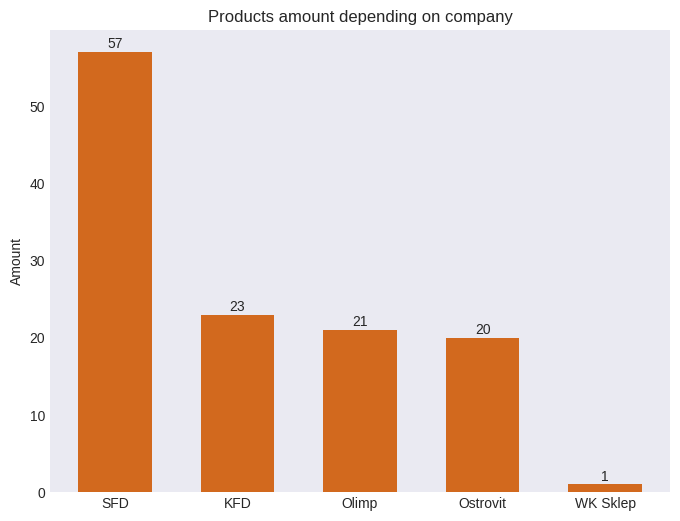

In [25]:
#products amount depending on company in dataset
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (8,6))
bar_chart(ax, whey['Company'].value_counts().index,  whey['Company'].value_counts().values, 'chocolate', 'Products amount depending on company', 'Amount')
add_text(ax, whey['Company'].value_counts().index,  whey['Company'].value_counts().values, -0.5, 0)

In [26]:
#packages categories
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'] )

In [27]:
whey['Package_type'][33] = 'bag'

<ipython-input-27-53b2c8795266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


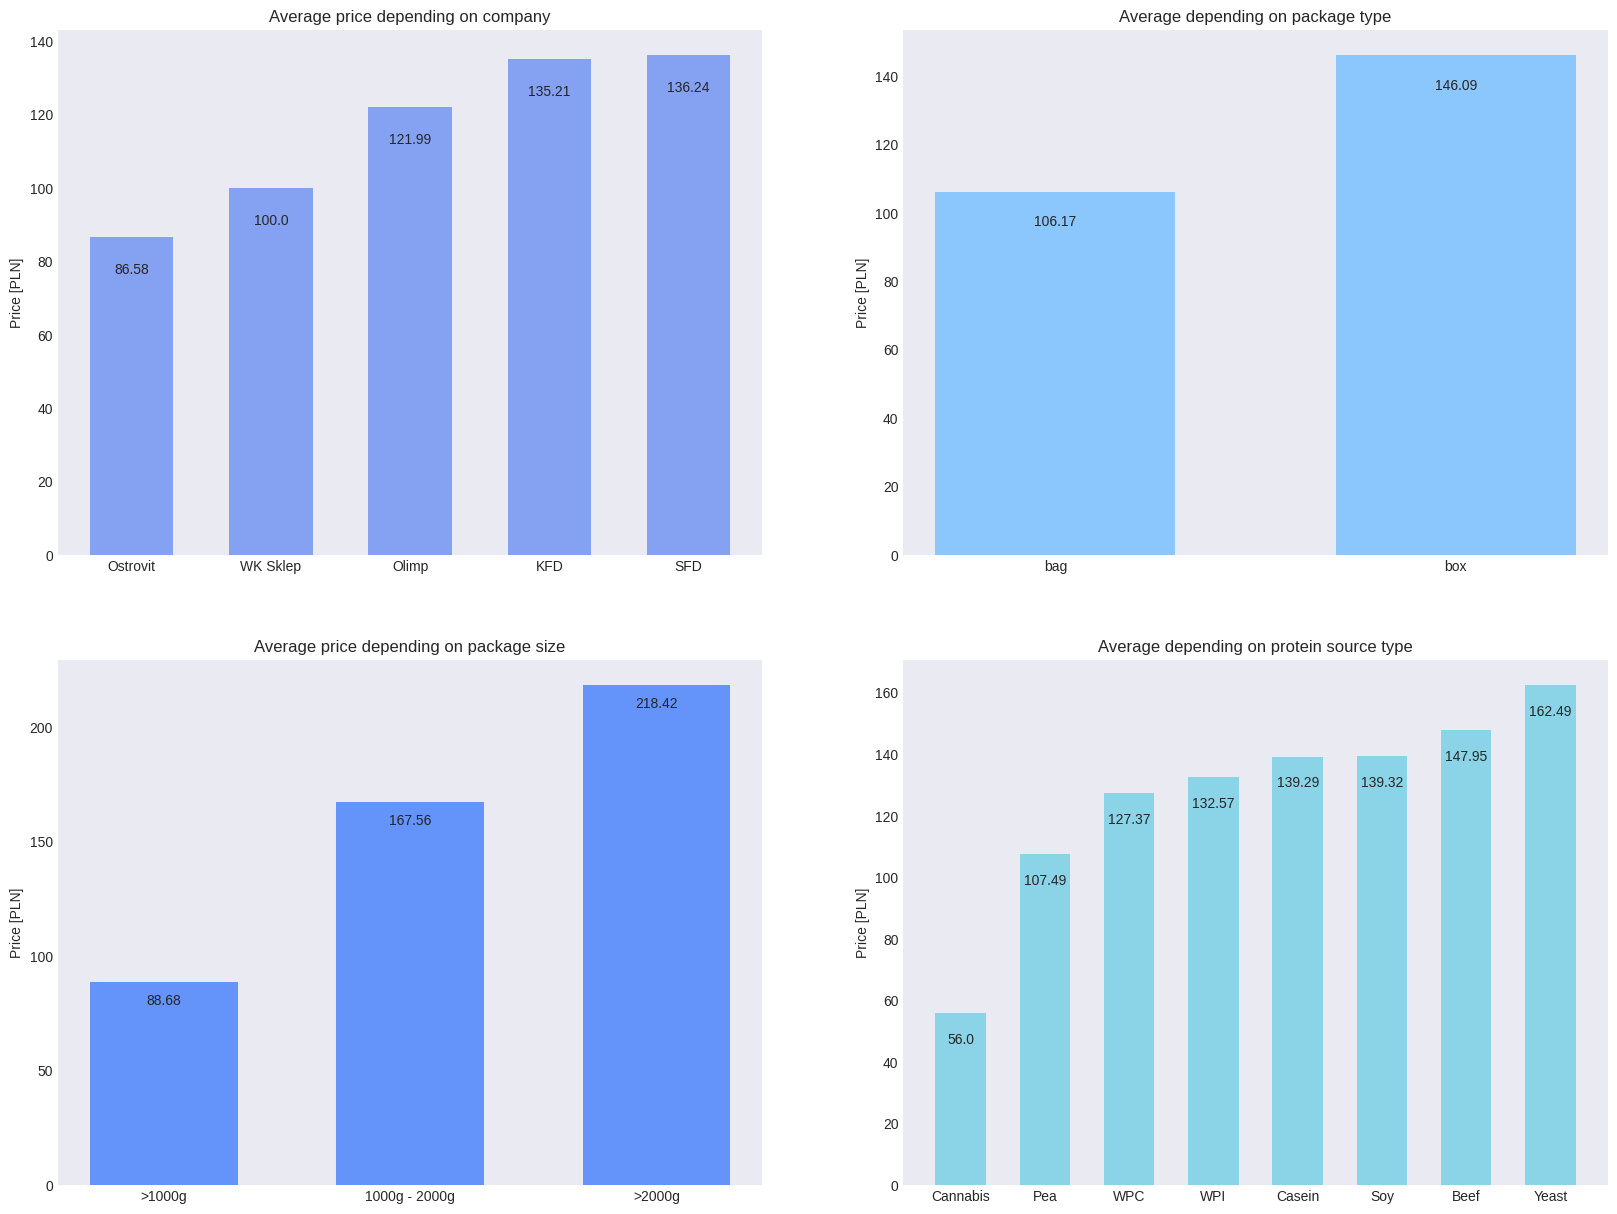

In [28]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bar_chart(ax[0,0], whey.groupby('Company')['Price'].mean().sort_values().index, whey.groupby('Company')['Price'].mean().sort_values().values, '#85A1F2', 'Average price depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, '#8BC6FC', 'Average depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, '#6493FA', 'Average price depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types_df.sort_values(by='Price')['Type'],types_df.sort_values(by='Price')['Price'],'#8BD3E6', 'Average depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price'].mean().index, whey.groupby('Company')['Price'].mean().values, 10, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, 10, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, 10, 0)
add_text(ax[1,1],  types_df.sort_values(by='Price')['Type'],types_df.sort_values(by='Price')['Price'], 10, 0)

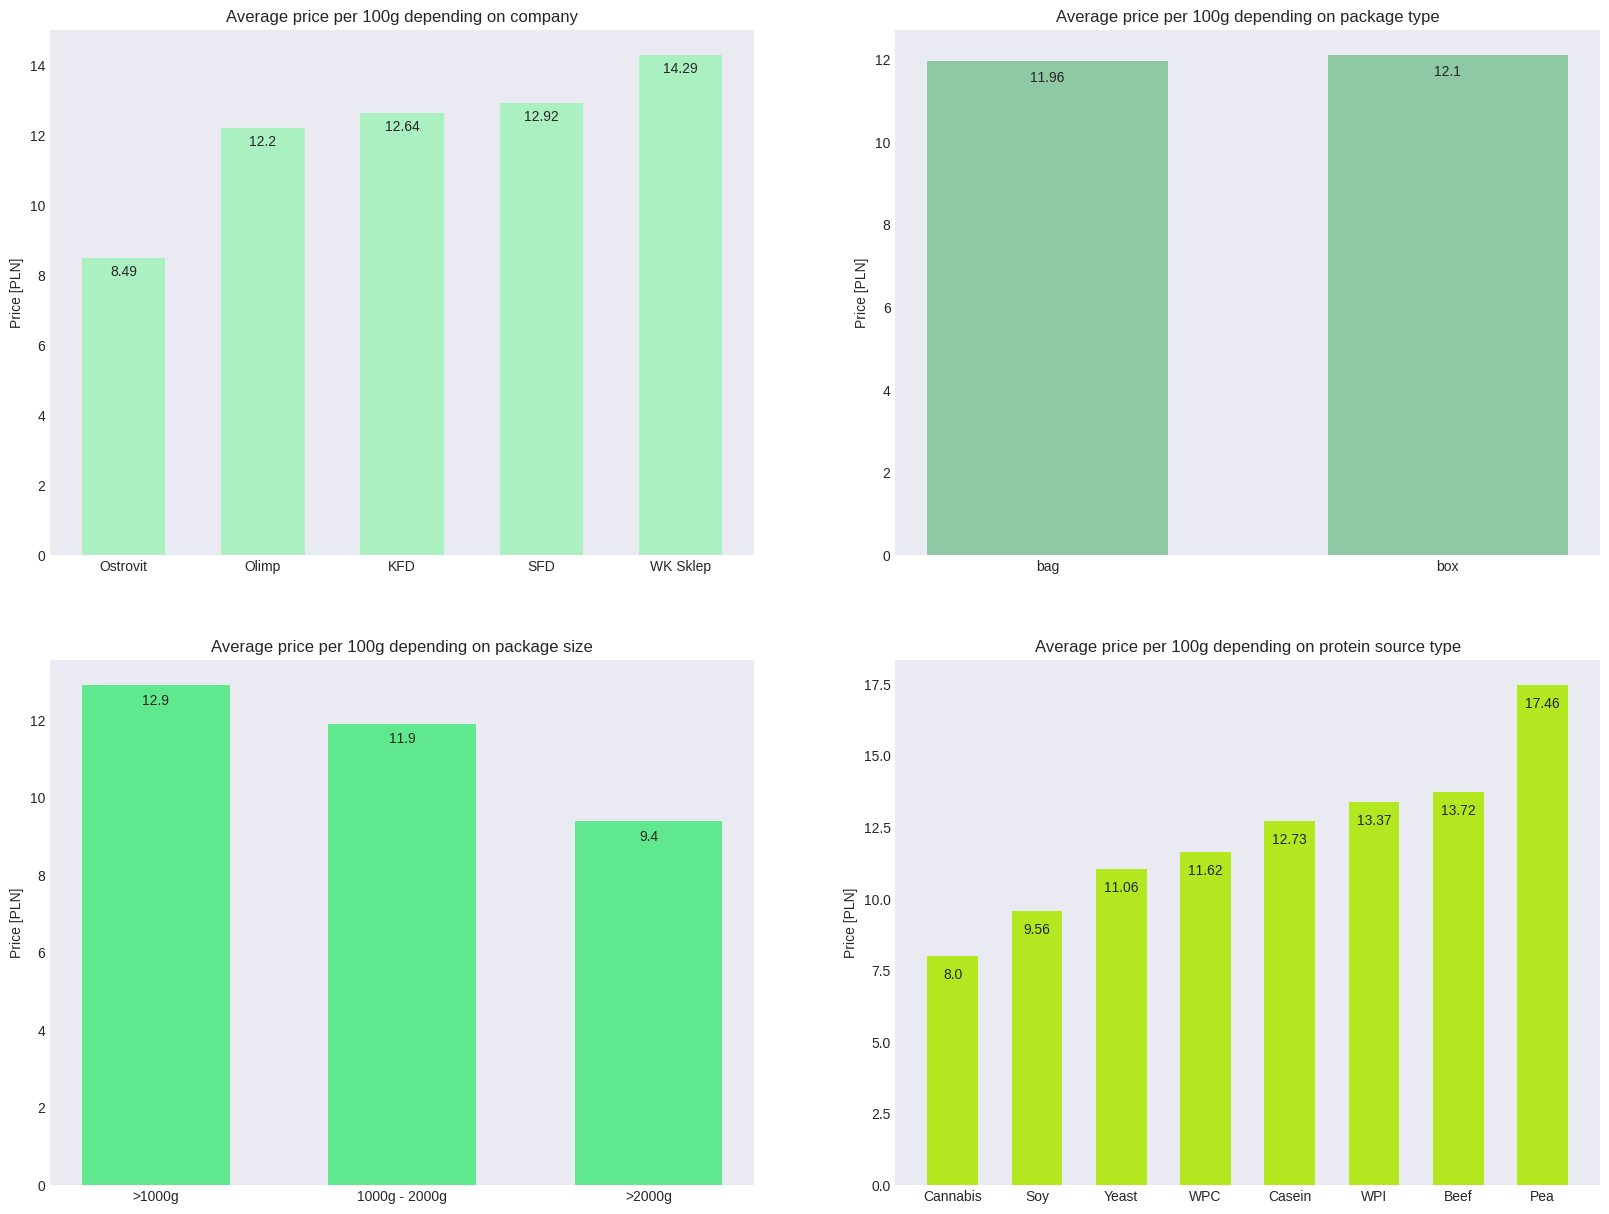

In [29]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bar_chart(ax[0,0], whey.groupby('Company')['Price/100'].mean().sort_values().index, whey.groupby('Company')['Price/100'].mean().sort_values().values, '#AAF0C1', 'Average price per 100g depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, '#8FC9A3', 'Average price per 100g depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, '#5FE88D', 'Average price per 100g depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types_df.sort_values(by='Price/100')['Type'],types_df.sort_values(by='Price/100')['Price/100'], '#B3E820', 'Average price per 100g depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price/100'].mean().index, whey.groupby('Company')['Price/100'].mean().values, 0.5, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,1], types_df.sort_values(by='Price/100')['Type'],types_df.sort_values(by='Price/100')['Price/100'], 0.8, 0)

# **4. Preparing data to model**

In [30]:
cat_columns = ['Company',	'Brand', 'Package_type']

In [31]:
for cat in cat_columns:
  whey[cat] = whey[cat].astype('category')
  whey[cat] = whey[cat].cat.codes

In [32]:
whey

,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,...,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100,Package_category
0,WPC PROTEIN PLUS 700g,3,21,700.0,0,394.000,6.00000,4.20000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143,>1000g
1,WPC PROTEIN PLUS 700g,3,21,700.0,0,394.000,6.00000,4.20000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143,>1000g
2,WPC PROTEIN PLUS 900g,3,21,900.0,0,394.000,6.00000,4.20000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,69.99,7.776667,>1000g
3,WPC PROTEIN PLUS 2250g,3,21,2250.0,0,394.000,6.00000,4.20000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,154.99,6.888444,>2000g
4,WPC PROTEIN PLUS 3000g,3,21,3000.0,1,394.000,6.00000,4.20000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,199.99,6.666333,>2000g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GENIUS IWHEY - 900g,0,8,900.0,1,387.879,5.15152,3.03030,6.06061,6.06061,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,128.99,14.332222,>1000g
146,GENIUS IWHEY - 2000g,0,8,2000.0,1,387.879,5.15152,3.03030,6.06061,6.06061,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,238.99,11.949500,>2000g
147,Olimp Pure Whey Isolate 95® - 600 g,0,14,600.0,0,352.000,0.50000,0.50000,1.00000,1.00000,...,86.0,0.0,0.0,0.0,0.00,0.0,0.0,109.00,18.166667,>1000g
151,SCITEC CASEIN COMPLEX 2350g,0,22,2350.0,1,386.667,5.33333,5.33333,8.33333,3.33333,...,0.0,0.0,0.0,0.0,76.67,0.0,0.0,259.99,11.063404,>2000g
